In [2]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

C:\Users\mac\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
# Plot Boundary Over Composite Image
# -----------------------------------
# .. note::
#       If you are on windows, you may need to add the crs issue discussed above
#       here!
#
# You can overlay a polygon boundary on top of an RGB plot created with EarthPy.
# To begin, the raster data and the boundary need to be in the same
# Coordinate Reference System (CRS). You can reproject the boundary layer to
# match the CRS of the image by getting the CRS of the image from the Rasterio
# profile object and passing that CRS to the ``to_crs`` method from GeoPandas.

In [4]:
file_path = 'C:/Users/mac/Documents/Python_Rasterio/AbayaLake/'

In [5]:
# Stack the landsat bands
# This creates a numpy array with each "layer" representing a single band
landsat_paths = glob(
    "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_*b*.tif"
)
landsat_paths.sort()
arr_st, meta = es.stack(landsat_paths)

In [6]:
# Get list of bands and sort by ascending band number
landsat_paths = "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_b*[1-7,9]*.tif"
stack_band_paths = glob(landsat_paths)
stack_band_paths.sort()

In [7]:
# Create image stack and apply nodata value for Landsat
arr_st, meta = es.stack(stack_band_paths, nodata=-9999)

In [8]:
# Open polygon boundary using GeoPandas
bound = gpd.read_file(
    "C:/Users/mac/Documents/Python_Rasterio/Gamo_Gofa.shp"
)

# Reproject boundary to match CRS of the Landsat images
with rio.open(stack_band_paths[0]) as raster_crs:
    raster_profile = raster_crs.profile
    bound_utm37N = bound.to_crs(raster_profile["crs"])

### Create a Plot With the Boundary overlayed on the RGB Image 

You can plot a polygon boundary over an image by creating a raster extent
for the plot using the ``plotting_extent`` function from ``rasterio.plot``.
The function needs the Rasterio profile of the image and a single layer of a
numpy array, which can be specified with ``arr_str[0]``. The function also
needs the spatial transformation for the Rasterio object, which can be acquired
by accessing the ``"transform"`` key within the Rasterio profile.

In [9]:
# Create raster extent for the plot
extent = plotting_extent(arr_st[0], raster_profile["transform"])

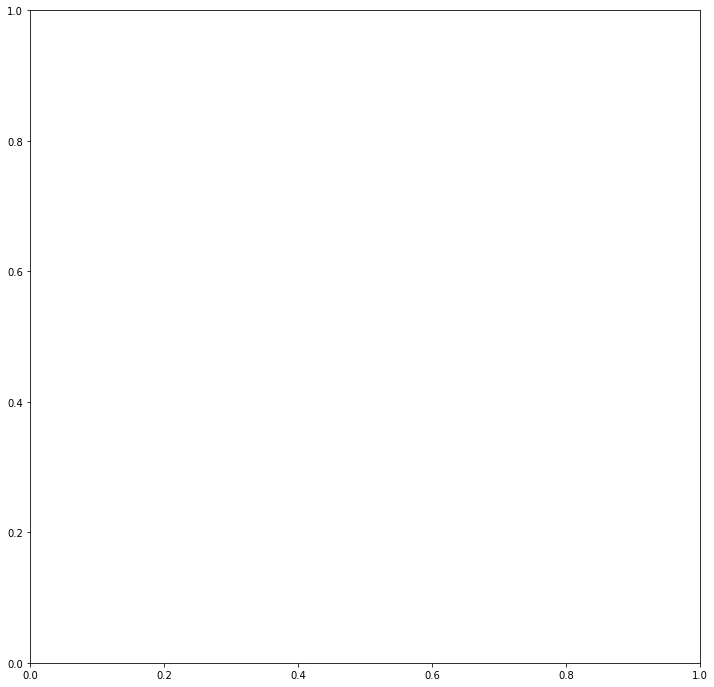

In [10]:
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12))

In [11]:
# Plot boundary with high zorder for contrast
bound_utm37N.boundary.plot(ax=ax, color="black", zorder=10)

<Figure size 432x288 with 0 Axes>

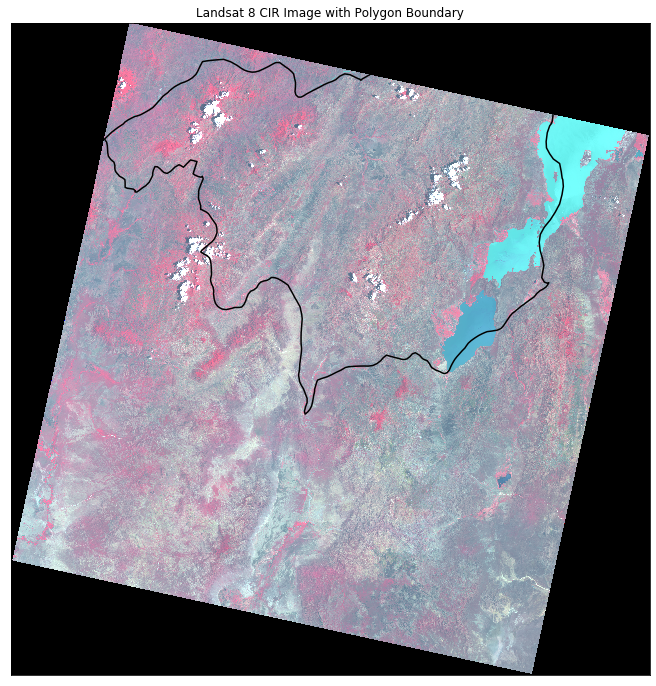

In [15]:
# Create figure with one plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot boundary with high zorder for contrast
bound_utm37N.boundary.plot(ax=ax, color="black", zorder=10)

# Plot CIR image using the raster extent
ep.plot_rgb(
    arr_st,
    rgb=(4, 3, 2),
    ax=ax,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="Landsat 8 CIR Image with Polygon Boundary",
)
plt.show()

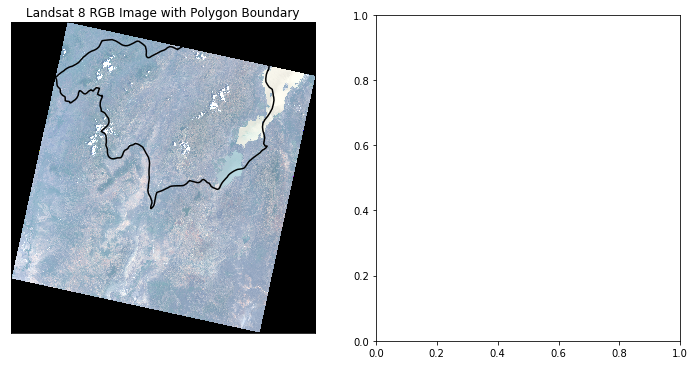

In [18]:
# Create figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot of RGB composite image with polygon boundary
bound_utm37N.boundary.plot(ax=ax1, color="black", zorder=10)

ax1 = ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    ax=ax1,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="Landsat 8 RGB Image with Polygon Boundary",
)

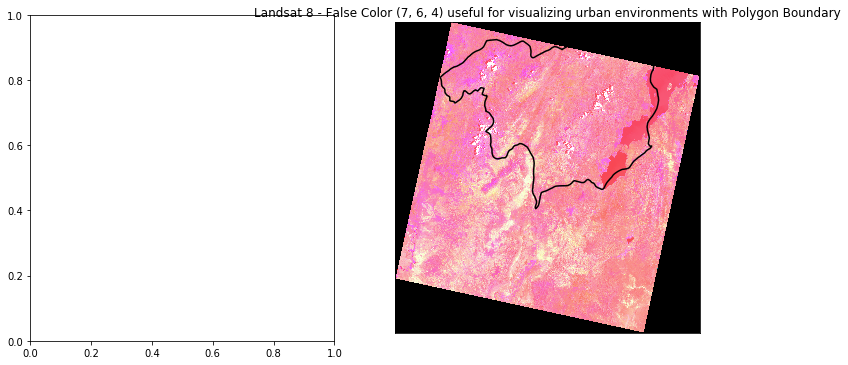

In [20]:
# Create figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot of False color composite image with polygon boundary
bound_utm37N.boundary.plot(ax=ax2, color="black", zorder=10)
ax2 = ep.plot_rgb(
    arr_st,
    rgb=(7, 6, 4),
    ax=ax2,
    stretch=True,
    extent=extent,
    str_clip=0.5,
    title="Landsat 8 - False Color (7, 6, 4) useful for visualizing urban environments with Polygon Boundary",
)
plt.show()